In [326]:
import numpy as np
import glob
import os

import numpy as np
import glob
import os
import matplotlib.pyplot as plt






from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


import matplotlib.pyplot as plt
import numpy as np

In [327]:
file = "atoms_init_f.bp"
f = open(file)

In [328]:
t_str = []
with open (file) as myfile:
    i=0
    for line in myfile:
        if i==1:
            t_str.append(line)
            i=0
        if "ITEM: TIMESTEP\n" in line:
            i=1
            

t_arr = [int(i) for i in t_str]

In [335]:
cell_arr  = np.zeros((7500, 9 ))

i=0
i_end=len(t_arr)-1
cell_str = []
with open (file) as myfile:
    for line in myfile:

        if ("ITEM: ATOMS" in line) and (i==i_end):
            break

        if ("ITEM: ATOMS" in line) and (i<i_end):
            i+=1

    for line in myfile:
        if "ITEM: TIMESTEP" in line:
            break
        cell_str.append(line)


cell_arr = np.array([np.array(cell_str[i].split( )).astype(float) for i in range(len(cell_str))])



xlim = 90
ylim = 1400
zlim = 300


cell_arr = cell_arr[(cell_arr[:,3]*zlim>60) | ( (cell_arr[:,2]*ylim<400) | (cell_arr[:,2]*ylim>1000)) , :]
cell_arr[:,0]=cell_arr[:,0].astype(int)
cell_arr[:,1:] = np.array([xlim,ylim,zlim])*cell_arr[:,1:]
cell_arr_type = np.ones((len(cell_arr),5))

cell_arr_type[:,0] = np.arange(1,len(cell_arr)+1)
cell_arr_type[:,2:] = cell_arr[:,1:]
cell_arr_type=cell_arr_type.astype(int)

In [336]:
np.savetxt('atoms_raw_in.txt', cell_arr_type,fmt = '%i')


In [337]:
len(cell_arr[:,0].astype(int))

6851

In [338]:


len(cell_arr_type)

6851

<_io.TextIOWrapper name='atoms_init_f.bp' mode='r' encoding='UTF-8'>


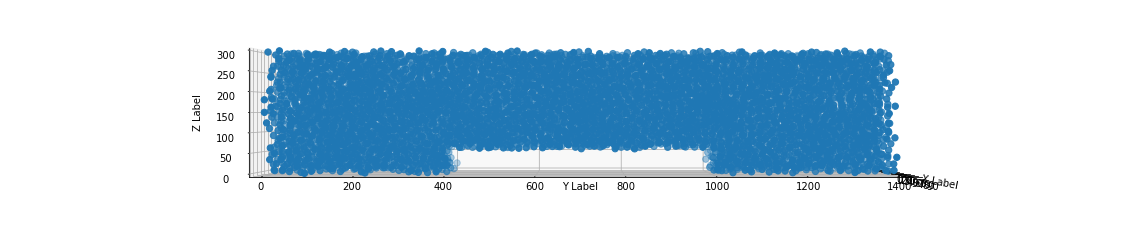

In [325]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(111, projection='3d')



n = 200

t =12
xlim=90
ylim = 1400
zlim=300
# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for m in arr:
#    ax.scatter(*m[1:4],s= (m[4])**2,cmap='viridis')
x=cell_arr[:,1].flatten()
y= cell_arr[:,2].flatten()
z=cell_arr[:,3].flatten()
#f = np.sum(cell_arr[t,:,7:]**2,axis=1)**.5

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.set_xlim([0,90])
ax.set_ylim([0,1400])

ax.set_zlim([0,300])



im = ax.scatter(x, y, z,s=40);
ax.view_init(0, 360)

print(f)


plt.show()



In [181]:
y

array([1.51280248e+03, 1.51774168e+04, 1.02154808e+04, ...,
       1.94687976e+06, 1.95131328e+06, 1.95717760e+06])